In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
input_file_path = "/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/raw/ml-100k"

# Read Files

In [8]:
file_name = "u.data"
item_cols = ["user_id","movie_id","rating","time"]
ml_ratings = pd.read_csv(f"{input_file_path}/{file_name}", sep="\t", names=item_cols, encoding='latin-1')

In [9]:
file_name = "u.genre"
item_cols = ["title","id"]
ml_genre = pd.read_csv(f"{input_file_path}/{file_name}", sep="|", names=item_cols, encoding='latin-1')

In [10]:
genre_c_name=list(ml_genre['title'])

In [11]:
file_name = "u.item"
item_cols = ['movie_id', 'title', 'release_date', "video_release_date", "imdb_url"] + genre_c_name
ml_movies = pd.read_csv(f"{input_file_path}/{file_name}", sep="|", names=item_cols, encoding='latin-1')

In [12]:
file_name = "u.occupation"
item_cols = ["occupation"]
ml_occupation = pd.read_csv(f"{input_file_path}/{file_name}", sep="|", names=item_cols, encoding='latin-1')

In [13]:
file_name = "u.user"
item_cols = ["id","age","gender","occupation","zip_code"]
ml_users = pd.read_csv(f"{input_file_path}/{file_name}", sep="|", names=item_cols, encoding='latin-1')

In [14]:
ml_ratings.head(5)

,user_id,movie_id,rating,time
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
ml_genre.head()

,title,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [16]:
ml_movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
ml_occupation.head()

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [18]:
ml_users.head()

,id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Preprocess users

In [19]:
ml_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [20]:
# Unique values in each column
for column in ml_users.columns:
    print(column, len(ml_users[column].unique()))

id 943
age 61
gender 2
occupation 21
zip_code 795


In [21]:
# Check for null values
ml_users.isna().sum()

id            0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

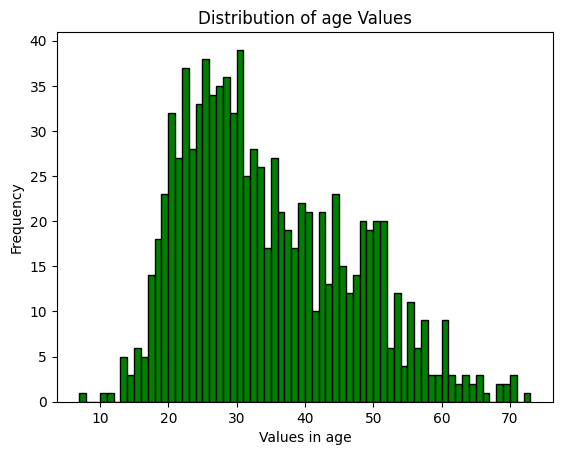

In [22]:
# Distribution of age
plt.hist(ml_users['age'], bins=range(min(ml_users['age']), max(ml_users['age']) + 1), color='green', edgecolor='black')
plt.xlabel('Values in age')
plt.ylabel('Frequency')
plt.title('Distribution of age Values')
plt.show()

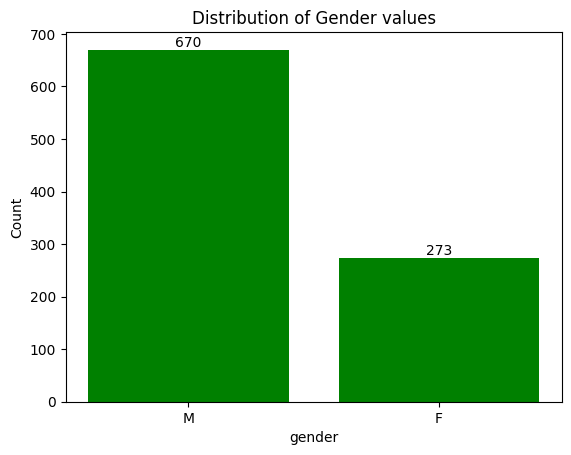

In [23]:
# Distribution of gender
# Calculate the value counts for each category
value_counts = ml_users['gender'].value_counts()

# Plot the bar plot
plt.bar(value_counts.index, value_counts, color='green')
# Add values on top of each bar
for i, v in enumerate(value_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Gender values')
plt.show()

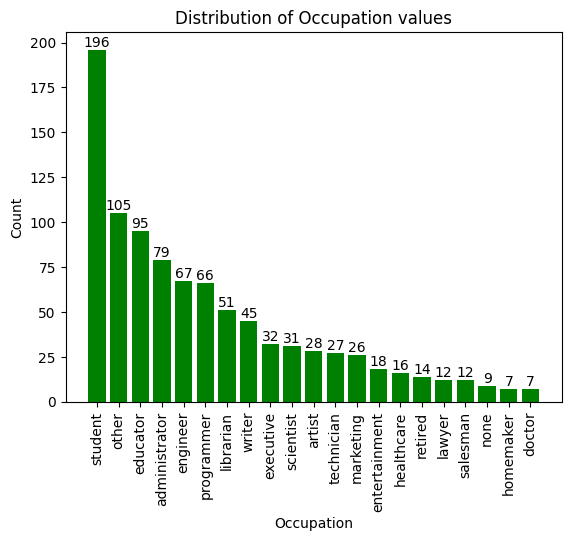

In [24]:
# Distribution of gender
# Calculate the value counts for each category
value_counts = ml_users['occupation'].value_counts()

# Plot the bar plot
plt.bar(value_counts.index, value_counts, color='green')
# Add values on top of each bar
for i, v in enumerate(value_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
# used to rotate the x-axis labels
plt.xticks(rotation=90, ha='center')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation values')
plt.show()

In [85]:
# save movies
ml_users.to_csv('/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/movieLense/users.csv', index=False)

# Preprocess movies

In [25]:
ml_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [26]:
# One of the movie has null date
ml_movies[ml_movies["release_date"].isnull()]

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Drop this movie as this has no title
ml_movies = ml_movies[~(ml_movies["release_date"].isnull())]

In [28]:
ml_movies.shape

(1681, 24)

In [29]:
# Unique values in each column
for column in ml_movies.columns:
    print(column, len(ml_movies[column].unique()))

movie_id 1681
title 1663
release_date 240
video_release_date 1
imdb_url 1661
unknown 2
Action 2
Adventure 2
Animation 2
Children's 2
Comedy 2
Crime 2
Documentary 2
Drama 2
Fantasy 2
Film-Noir 2
Horror 2
Musical 2
Mystery 2
Romance 2
Sci-Fi 2
Thriller 2
War 2
Western 2


In [30]:
# Duplicate titles
ml_movies[ml_movies["title"].duplicated()]

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
267,268,Chasing Amy (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
302,303,Ulee's Gold (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ulee%27s+Gold...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,348,Desperate Measures (1998),30-Jan-1998,NaN,http://us.imdb.com/Title?Desperate+Measures+(1...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
499,500,Fly Away Home (1996),13-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Fly%20Away%20...,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
669,670,Body Snatchers (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Body%20Snatch...,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
679,680,Kull the Conqueror (1997),29-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Kull+the+Conq...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
864,865,"Ice Storm, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ice+Storm%2C+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
880,881,Money Talks (1997),22-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Money+Talks+(...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,1003,That Darn Cat! (1997),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?That%20Darn%2...,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1256,1257,"Designated Mourner, The (1997)",23-May-1997,NaN,http://us.imdb.com/M/title-exact?Designated%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Drop the duplicates
ml_movies = ml_movies[~(ml_movies["title"].duplicated())]

In [32]:
# Check again
ml_movies[ml_movies["title"]=="Chasing Amy (1997)"]

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
245,246,Chasing Amy (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
ml_movies.shape

(1663, 24)

In [34]:
# Lets plot the distribution of movie geners
# Extract values of various genres in two seperate arrays by values
values0 =[]
values1=[]
for column in ml_movies[genre_c_name]:
    value_counts = ml_movies[column].value_counts()
    values0.append(value_counts[0])
    values1.append(value_counts[1])

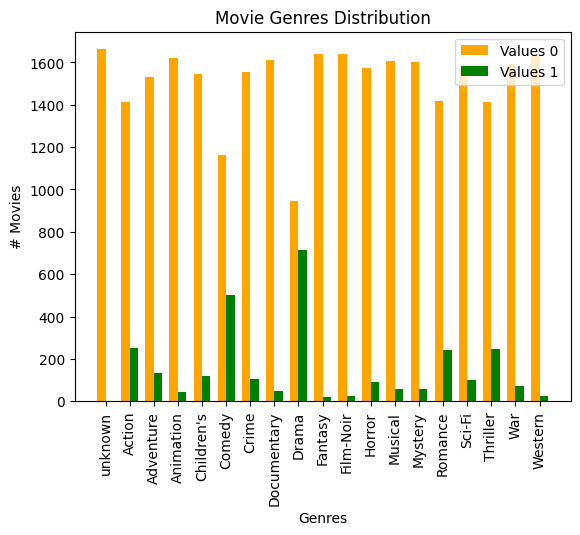

In [37]:

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
bar_positions1 = np.arange(len(genre_c_name))
bar_positions2 = bar_positions1 + bar_width

# Create a bar plot
plt.bar(bar_positions1, values0, width=bar_width, label='Values 0', color='orange')
plt.bar(bar_positions2, values1, width=bar_width, label='Values 1', color='green')

# Customize the plot
plt.xlabel('Genres')
plt.ylabel('# Movies')

# used to rotate the x-axis labels
plt.xticks(rotation=90, ha='center')
plt.title('Movie Genres Distribution')
plt.xticks(bar_positions1 + bar_width / 2, genre_c_name)
plt.legend()

# Show the plot
plt.show()

## Add IMDB ID
IMDB ID is a unique reference assigned to each movie item so that the details of each movie can be retrieved using IMDB APIs

In [38]:
ml_imdb_lk = pd.read_csv("/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/movieLense/ml_movie_link_imdb.csv", encoding='latin-1')

In [39]:
ml_imdb_lk.head(5)

,ml_id,title,year,imdb_id,Tokenized_title
0,1,Toy Story,1995,tt0114709,"['toy', 'story']"
1,2,GoldenEye,1995,tt0097446,['goldeneye']
2,3,Four Rooms,1995,tt0113101,"['four', 'rooms']"
3,4,Get Shorty,1995,tt0113161,"['get', 'shorty']"
4,5,Copycat,1995,tt0112722,['copycat']


In [41]:
movies_df = pd.merge(ml_imdb_lk, ml_movies, left_on='ml_id', right_on='movie_id',how='inner')

In [42]:
movies_df.head()

,ml_id,title_x,year,imdb_id,Tokenized_title,movie_id,title_y,release_date,video_release_date,imdb_url,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,tt0114709,"['toy', 'story']",1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,tt0097446,['goldeneye'],2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,tt0113101,"['four', 'rooms']",3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,tt0113161,"['get', 'shorty']",4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,tt0112722,['copycat'],5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),...,0,0,0,0,0,0,0,1,0,0


In [43]:
# Drop columns not useful
movies_df.drop(columns=["title_y","Tokenized_title","movie_id","release_date","video_release_date","imdb_url"],inplace=True)

In [44]:
movies_df.shape

(1663, 23)

In [45]:
# Rename columns
movies_df.rename(columns={'title_x': 'title', 'year': 'release_year'}, inplace=True)

In [46]:
movies_df.head()

,ml_id,title,release_year,imdb_id,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,tt0097446,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,tt0113101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,tt0113161,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,tt0112722,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Add Movie summary

In [47]:
# Search imdb id in the file for retreiving the summary
ml_summary = pd.read_csv("/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/MovieSummaries/movie_summary_with_imdb_id.csv", encoding='latin-1')

In [48]:
ml_summary.head(1)

,m_plot_summary,cleaned_m_plot_summary,m_freebase_id,m_title,m_release_date,m_box_off_revenue,m_runtime,m_languages,m_countries,m_genres,m_wikipedia_id,year,month,day,imdb_id
0,"Shlykov, a hard-working taxi driver and Lyosha...","Shlykov, a hard-working taxi driver and Lyosha...",/m/076w2lb,Taxi Blues,1990-09-07,NaN,110.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/0f8l9c"": ""France"", ""/m/05vz3zq"": ""Soviet ...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",23890098,1990.0,9.0,7.0,tt0100757


In [49]:
df1 = pd.merge(ml_summary, movies_df,on="imdb_id",how='right')

In [50]:
df1.shape

(1663, 37)

In [52]:
df1.head(1)

,m_plot_summary,cleaned_m_plot_summary,m_freebase_id,m_title,m_release_date,m_box_off_revenue,m_runtime,m_languages,m_countries,m_genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Woody is a pull-string cowboy doll and leader...,Woody is a pull-string cowboy doll and leader ...,/m/0dyb1,Toy Story,1995-11-19,361958736.0,77.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0556j8"": ""Buddy film"", ""/m/03k9fj"": ""Adve...",...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Add new column to the movies DF
movies_df["plot_summary"] = df1["cleaned_m_plot_summary"]

In [54]:
movies_df.head(1)

,ml_id,title,release_year,imdb_id,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,plot_summary
0,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,Woody is a pull-string cowboy doll and leader ...


## Add cast and crew

In [55]:
# To identify cast and crew, we will use IMDB name file
imdb_name = pd.read_csv("/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/imdb/cleaned_name.basics.csv", encoding='latin-1')

In [56]:
imdb_name.head(2)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0075213,tt0038355"


In [57]:
# test for one movie
imdb_name[imdb_name["knownForTitles"].str.contains("tt0114709")]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
740,nm0000741,Tim Allen,1953,\N,"actor,producer,miscellaneous","tt0177789,tt0114709,tt0101120,tt0111070"
1650,nm0001652,John Ratzenberger,1947,\N,"actor,director,soundtrack","tt0083399,tt0114709,tt0317219,tt0910970"
1726,nm0001728,Wallace Shawn,1943,\N,"actor,writer,soundtrack","tt0082783,tt0317705,tt0114709,tt0093779"
1813,nm0001815,Jim Varney,1949,2000,"actor,soundtrack,writer","tt0230011,tt0092974,tt0114709,tt0095107"
5099,nm0005124,John Lasseter,1957,\N,"producer,writer,director","tt0114709,tt0120363,tt0120623,tt0317219"
...,...,...,...,...,...,...
5296059,nm14706598,Goro Nakagawa,\N,\N,miscellaneous,tt0114709
6781759,nm2542560,Gustavo RamÃ­rez,\N,\N,miscellaneous,tt0114709
7028047,nm2826879,Gabriel Rosas,\N,\N,"sound_department,art_department","tt0433696,tt0206512,tt0419315,tt0114709"
9744056,nm5951380,KyÃ´suke ItÃ´,\N,\N,"miscellaneous,sound_department","tt2263353,tt0114709,tt0120363"


In [58]:
# We will not use knownForTitles column as it contains too many details. Instead we will use principals files that has
# limited 11 categories of crew and extract name of the crew from the name file to enable search using person name.

In [59]:
imdb_principals = pd.read_csv("/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/imdb/cleaned_title_principals.csv", encoding='latin-1')

In [60]:
imdb_principals.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,2,nm0005690,director,\N,\N
1,tt0000001,3,nm0374658,cinematographer,director of photography,\N
2,tt0000002,1,nm0721526,director,\N,\N


In [61]:
# Unique values in each column
for column in imdb_principals.columns:
    print(column, len(imdb_principals[column].unique()))

tconst 7788463
ordering 13
nconst 4209505
category 11
job 39898
characters 2519587


In [62]:
# Extract categories
crew_categories = imdb_principals["category"].unique()

In [63]:
# Convert list to DF
crew_categories_df = pd.DataFrame(crew_categories)

In [64]:
# Save Categories in a file to use later
crew_categories_df.to_csv('/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/movieLense/crew_categories.csv', index=False)

In [65]:
movies_df.head(3)

,ml_id,title,release_year,imdb_id,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,plot_summary
0,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,Woody is a pull-string cowboy doll and leader ...
1,2,GoldenEye,1995,tt0097446,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,3,Four Rooms,1995,tt0113101,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"The film is set on New Year's Eve, and starts ..."


In [66]:
def populate_crew_name(df):
    '''
    Function to extract crew names using imdb_name
    '''
    for index, row in df.iterrows():
        search_string = row.loc["nconst"]
        name = imdb_name.loc[imdb_name["nconst"] == row.loc["nconst"]]["primaryName"]
        df.loc[index,'crew_name'] = name.iloc[0]
    return df

In [67]:
import warnings

In [68]:
selected_columns = ['category', 'crew_name']

In [69]:
import timeit

In [74]:
# def my_function1():
#     df = imdb_principals[imdb_principals["tconst"] == "tt0114709"]
#     return df

# def my_function2():
#     df1 = pd.merge(imdb_principals, movies_df,left_on='tconst', right_on='imdb_id',how='inner')
#     return df1

# # Time the function using timeit
# execution_time1 = timeit.timeit(my_function1,number=1)

# # Print the execution time
# print(f'Time taken-1: {execution_time1} seconds')

# # Time the function using timeit
# execution_time2 = timeit.timeit(my_function2,number=1)

# # Print the execution time
# print(f'Time taken-2: {execution_time2} seconds')


Time taken-1: 1.85644112501177 seconds
Time taken-2: 6.61032000000705 seconds


In [78]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
    for index, row in tqdm(movies_df.iterrows(),desc="Processing movie titles"):
        df = imdb_principals[imdb_principals["tconst"] == row.loc["imdb_id"]]
        if df.empty:
            print("No principals found for - " + row.loc["imdb_id"])
        else:
            df = populate_crew_name(df)
            selected_df = df[selected_columns]
            json_data = selected_df.to_json(orient='records')
            movies_df.at[index,'crew'] = json_data


Processing movie titles: 151it [13:04,  4.27s/it]

No principals found for - tt10624308


Processing movie titles: 235it [1:12:36,  5.18s/it] 

No principals found for - tt0030423


Processing movie titles: 534it [1:37:58,  4.31s/it]

No principals found for - tt11127976


Processing movie titles: 562it [1:40:18,  4.20s/it]

No principals found for - tt10781788


Processing movie titles: 582it [1:42:01,  4.25s/it]

No principals found for - tt5494894


Processing movie titles: 595it [1:43:02,  4.16s/it]

No principals found for - tt21975808


Processing movie titles: 613it [1:44:27,  4.04s/it]

No principals found for - tt0001210


Processing movie titles: 649it [1:47:31,  4.19s/it]

No principals found for - tt0005090


Processing movie titles: 672it [1:49:28,  4.29s/it]

No principals found for - tt0009260


Processing movie titles: 727it [1:54:10,  3.78s/it]

No principals found for - tt0057764


Processing movie titles: 952it [2:13:07,  3.96s/it]

No principals found for - tt0071067


Processing movie titles: 1011it [2:18:12,  4.31s/it]

No principals found for - tt0022350


Processing movie titles: 1206it [2:34:49,  4.24s/it]

No principals found for - tt0009670


Processing movie titles: 1290it [2:41:57,  4.06s/it]

No principals found for - tt0003984


Processing movie titles: 1348it [2:46:44,  4.04s/it]

No principals found for - tt8702334


Processing movie titles: 1663it [3:13:28,  6.98s/it]


In [79]:
movies_df.head(3)

,ml_id,title,release_year,imdb_id,unknown,Action,Adventure,Animation,Children's,Comedy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,plot_summary,crew
0,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,Woody is a pull-string cowboy doll and leader ...,"[{""category"":""writer"",""crew_name"":""Joel Cohen""..."
1,2,GoldenEye,1995,tt0097446,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,NaN,"[{""category"":""composer"",""crew_name"":""Michael B..."
2,3,Four Rooms,1995,tt0113101,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"The film is set on New Year's Eve, and starts ...","[{""category"":""producer"",""crew_name"":""Lawrence ..."


In [80]:
# save movies
movies_df.to_csv('/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/movieLense/movies_combined.csv', index=False)

# Preprocess Ratings

In [81]:
ml_ratings.head(3)

,user_id,movie_id,rating,time
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [84]:
# There are 100,000 ratings given by 943 users for 1682 movies
ml_ratings.shape

(100000, 4)

In [83]:
ml_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   100000 non-null  int64
 1   movie_id  100000 non-null  int64
 2   rating    100000 non-null  int64
 3   time      100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [82]:
# Unique values in each column
for column in ml_ratings.columns:
    print(column, len(ml_ratings[column].unique()))

user_id 943
movie_id 1682
rating 5
time 49282


In [86]:
# First merge with users file
df1 = pd.merge(ml_users,ml_ratings,how='inner',left_on="id",right_on="user_id")

In [88]:
df1.shape
# shape 100K show all users who rated the movies are present in the users master file.

(100000, 9)

In [93]:
df1.head()

,id,age,gender,occupation,zip_code,user_id,movie_id,rating,time
0,1,24,M,technician,85711,1,61,4,878542420
1,1,24,M,technician,85711,1,189,3,888732928
2,1,24,M,technician,85711,1,33,4,878542699
3,1,24,M,technician,85711,1,160,4,875072547
4,1,24,M,technician,85711,1,20,4,887431883


In [94]:
# Merge this with movie_id
df2 = pd.merge(movies_df,df1,how='inner',left_on="ml_id",right_on="movie_id")

In [95]:
df2.shape

(99383, 34)

In [96]:
df2.head()

,ml_id,title,release_year,imdb_id,unknown,Action,Adventure,Animation,Children's,Comedy,...,crew,id,age,gender,occupation,zip_code,user_id,movie_id,rating,time
0,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,"[{""category"":""writer"",""crew_name"":""Joel Cohen""...",1,24,M,technician,85711,1,1,5,874965758
1,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,"[{""category"":""writer"",""crew_name"":""Joel Cohen""...",2,53,F,other,94043,2,1,4,888550871
2,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,"[{""category"":""writer"",""crew_name"":""Joel Cohen""...",5,33,F,other,15213,5,1,4,875635748
3,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,"[{""category"":""writer"",""crew_name"":""Joel Cohen""...",6,42,M,executive,98101,6,1,4,883599478
4,1,Toy Story,1995,tt0114709,0,0,0,1,1,1,...,"[{""category"":""writer"",""crew_name"":""Joel Cohen""...",10,53,M,lawyer,90703,10,1,4,877888877


In [98]:
df2.columns

Index(['ml_id', 'title', 'release_year', 'imdb_id', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'plot_summary', 'crew', 'id', 'age', 'gender', 'occupation', 'zip_code',
       'user_id', 'movie_id', 'rating', 'time'],
      dtype='object')

In [97]:
# save combined ratings file
df2.to_csv('/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/movieLense/ratings_combined.csv', index=False)

In [99]:
selected_columns = ['user_id','movie_id','imdb_id','rating']

In [100]:
selected_df = df2[selected_columns]

In [102]:
selected_df.shape

(99383, 4)

In [103]:
selected_df.head()

,user_id,movie_id,imdb_id,rating
0,1,1,tt0114709,5
1,2,1,tt0114709,4
2,5,1,tt0114709,4
3,6,1,tt0114709,4
4,10,1,tt0114709,4


In [101]:
# save short ratings file as well
selected_df.to_csv('/Users/gauridhumal/Development Projects/UOL-PROJECTs/CRS/DS/crs_ds/data/processed/movieLense/ratings_short.csv', index=False)

In [110]:
selected_df["rating"].value_counts()

4    33943
3    26999
5    21076
2    11307
1     6058
Name: rating, dtype: int64

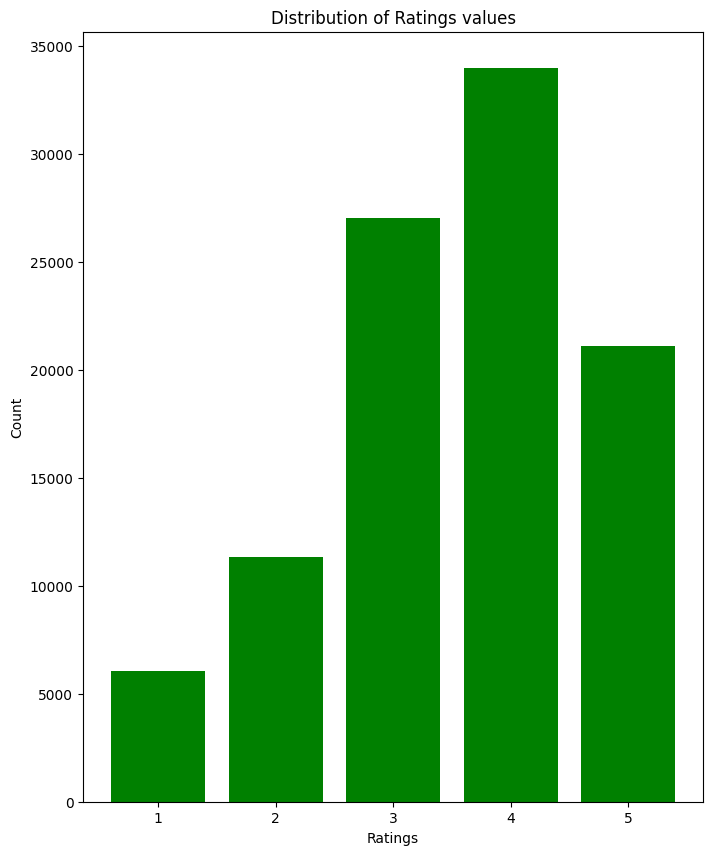

In [126]:
# Calculate the value counts for each ratings
value_counts = selected_df["rating"].value_counts()
plt.figure(figsize=(8, 10))

# Plot the bar plot
plt.bar(value_counts.index, value_counts, color='green')
# Add values on top of each bar
# for i, v in enumerate(value_counts):
#     print(i)
#     print(v)
#     plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings values')
plt.show()